# Statistical Analysis of Borehole data using Python

## About the data...

Data is from a single borehole on an iron ore property located in Labrador NFLD. The data has been depth matched and errors have been removed. It was then matched up with client supplied core logged information (lithology and formations). All the data was then exported into a single CSV file. Null values are written as -999.

It includes the following data:

| Header | Parameter | Units| Description
|------------|----------|------|------------------------------------|
|Depth_m | Depth |  m | Depth downhole.|
|RockType| Lithology | N/A |  Lithology classification from core log data.|
|Formation| Formation | N/A| Formation classification from core log data. |
|Natural Gamma_API| Natural Gamma| API| Natural Gamma from downhole log.|
|SP_mV|Spontaneous Potential| mV| Spontaneous Potential from downhole log.|
|SP Resistance_Ohm	| Single Point Resistance| Ohm| Single Point Resistance from downhole log.|
|Fluid Resistivity_Ohm| Fluid Resistivity| Ohm| Fluid Resistivity from downhole log.|
|Temperature_DegC|Temperature| Degrees Celsius| Temperature from downhole log.|
|Res8_Ohm-m|8 Inch Resistivity|Ohm-m| Resistivity from 8 inch receiver from downhole log.|
|Res16_Ohm-m|16 Inch Resistivity|Ohm-m| Resistivity from 16 inch receiver from downhole log.|
|Res32_Ohm-m|32 Inch Resistivity|Ohm-m| Resistivity from 32 inch receiver from downhole log.|
|Res64_Ohm-m|64 Inch Resistivity|Ohm-m| Resistivity from 64 inch receiver from downhole log.|
|Near Density_gcc|Near Density| g/cc| Density from the near detector from downhole log.|
|Far Density_gcc|Far Density | g/cc| Density from the far detector from downhole log.|
|MS_mCGS|Magnetic Susceptibiltiy| mCGS| Magnetic Susceptibility from downhole log.|

## Lithology Dictionary
|Code|LongName|
|------|-----------------|
|B_MS_SCH|Biotite Meta-Sediment Schist|
|GF_B_MS_SCH|Graphite Biotite Meta-Sediment Schist|
|HBG_GN|Biotite Garnet Gneiss|
|HIF|Hematite Iron Formation|
|HMIF|Hematite-Magnetite Iron Formation|
|MHIF|Magnetite-Hematite Iron Formation|
|MIF|Magnetite Iron Formation|
|MS_B_SCH|Meta-Sediment Biotite Schist|
|QCIF|Quartz Carbonate Iron Formation|
|QSIF|Quartz Sulfur Iron Formation|
|QZT|Quartz Vien|
|QZT-MS|Quartz Vien - Meta-Sediment|
|QZ_MS_B_CC_SCH|Quartz Meta-Sediment Biotite Carbonate Schist|
|SIF|Sulfur Iron Formation|





## Using Python and IPython Notebook
Python is a programming language that is used extensively in data analysis. Some other popular languages include MATLAB and R.  For the purposed of this exercise we will use Python with the SciPy package which includes *pandas* for data management and *matplotlib* for visualization. IPython is an interactive interpreter that allows you to analyze data while having your results and notes inline with the code. 

The code is here for reference and thus we will not be discussing what each piece does. However, if you have further questions about the code, please contact Patrick Hooker at phooker@dgigeoscience.com


## Import libraries 

To start we must initialise the worksheet and import the libraries we plan to use. 

In [19]:
%pylab inline
pylab.rcParams['figure.figsize'] = [12.0, 10.0]
import numpy as np
from scipy import stats
import matplotlib.pyplot as pt
import pandas as pd


Populating the interactive namespace from numpy and matplotlib


## Import Data

Using pandas, we import the data and set the first column (Depth) in the sheet as the main index. 
Then we find all the null values and set them as NaN (not a number).

In [2]:
data=pd.read_csv('Course_Data.csv',index_col=0)
data=data.replace(-999,np.nan)
data.head(20)

,RockType,Formation,NaturalGamma_API,SP_mV,SPResistance_Ohm,FluidResistivity_Ohm,Temperature_DegC,Res8_Ohm-m,Res16_Ohm-m,Res32_Ohm-m,Res64_Ohm-m,NearDensity_gcc,FarDensity_gcc,MS_mCGS
Depth_m,,,,,,,,,,,,,,
7.8,MS_B_SCH,Menihek Fm (HW),311.868,147.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.69629,2.68244,0.201979
8.0,MS_B_SCH,Menihek Fm (HW),290.243,145.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.71381,2.71279,0.232668
8.2,MS_B_SCH,Menihek Fm (HW),252.250,140.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.75687,2.72810,0.230927
8.4,MS_B_SCH,Menihek Fm (HW),193.140,135.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.76645,2.65252,0.276198
8.6,MS_B_SCH,Menihek Fm (HW),258.828,129.500,NaN,NaN,NaN,NaN,NaN,NaN,539295.00,2.51283,2.62399,0.225485
8.8,MS_B_SCH,Menihek Fm (HW),256.501,123.750,NaN,NaN,NaN,NaN,NaN,NaN,270758.00,2.60199,2.58747,0.261616
9.0,MS_B_SCH,Menihek Fm (HW),276.357,119.875,NaN,NaN,NaN,NaN,NaN,207332.0,121757.00,2.77611,2.70609,0.283381
9.2,MS_B_SCH,Menihek Fm (HW),281.147,120.875,NaN,NaN,NaN,126190.0,169288.0,217294.0,391148.00,2.75093,2.67952,0.350417
9.4,MS_B_SCH,Menihek Fm (HW),251.344,120.500,NaN,NaN,NaN,124161.0,174103.0,221426.0,554147.00,2.73387,2.69965,0.377406


## Basic Descriptive Statistics

#### Measure of Central Tendency (Averages)
- Mean
  * Sum of data points divided by the number of data points
  * Most popular measure of average
  * Susceptible to outliers and bad data
- Median
  * The middle value in an ordered data set
  * Not susceptible to outliers and bad data 
- Mode
  * The most frequently occurring value in a data set
  * Does not give indication to shape of distribution

#### Measures of Spread, Variability and Shape
- Standard Deviation
  * Measure of the dispersion from the mean
- Variance
  * The square of the standard deviation
- Range
  * The difference between the minimum and maximum values in a data set
- Quartiles and Inter-quartile range
  * 25th and 75th percentile are defined as the 1st and 3rd quartile; the 2nd quartile (50th percentile) is the median
  * Inter-quartile range is the difference between the 1st and 3rd quartiles. 
 

The data can now be quickly summarized using the describe() function. 

Highlight and drag the table to scroll horizontally.

In [3]:
data.describe()

,NaturalGamma_API,SP_mV,SPResistance_Ohm,FluidResistivity_Ohm,Temperature_DegC,Res8_Ohm-m,Res16_Ohm-m,Res32_Ohm-m,Res64_Ohm-m,NearDensity_gcc,FarDensity_gcc,MS_mCGS
count,1173.000000,1197.000000,1185.000000,1193.000000,1193.000000,1195.000000,1195.000000,1196.000000,1196.000000,1167.000000,1167.000000,1174.000000
mean,118.306628,624.380952,4377.725089,94.375154,2.960748,7439.416873,11811.438741,10263.185154,15106.874532,3.044097,3.053332,8.913572
std,121.521273,101.746861,9255.083967,33.629276,0.355316,15192.706016,27636.722849,31548.503845,41853.955566,0.445379,0.356299,16.462624
min,0.000000,112.125000,21.652900,49.517600,2.591800,231.741000,469.357000,818.374000,-15944.600000,2.325180,2.526630,0.116877
25%,3.569130,587.125000,990.021000,55.152000,2.760740,869.257500,1053.795000,1509.235000,3255.907500,2.707045,2.775385,0.165849
50%,56.837000,640.000000,2778.800000,111.969000,2.794920,3506.380000,3809.430000,2596.305000,4916.525000,2.805150,2.865240,0.260745
75%,231.736000,697.000000,5448.740000,125.552000,3.031250,9870.610000,12200.900000,5638.502500,8825.622500,3.423805,3.386885,5.099245
max,636.726000,857.125000,91677.500000,145.122000,4.115230,146346.000000,291824.000000,364669.000000,554611.000000,4.390060,3.977050,62.544900


***
# Question 1

Examining the table above, there is at least one parameter that may contain an error. What is it and why?









***

## Visualization

### Histograms

Data is distributed into bins that are defined by either a total number of bins or specific values. The data is plotted using bar graphs with the x-axis representing the value and the y-axis representing the frequency.  These graphs are useful for identifying anomalies in the data such as skewed distributions or many values occurring within a single bin.

  
### Distribution Shapes

Below are several examples of histogram distributions. 

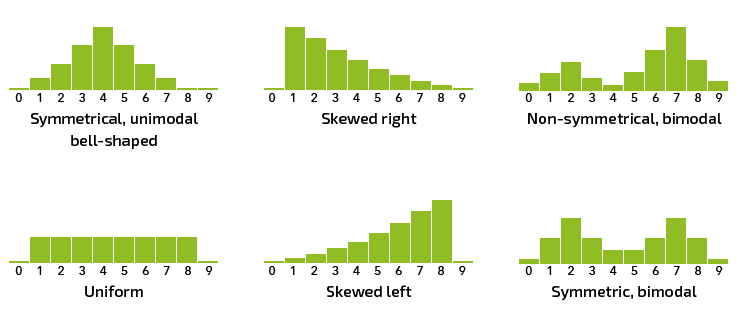

Most randomly sampled distributions should follow a normal or bell-shaped distribution, however most of the data that is collected is not randomly sampled, it can be influced by factors such as lithology, alteration, borehole conditions, or probe calibrations. Examining the shape of the distribution can illustrate these factors through bi-modal or skewed distributions. Understanding why these occur leads to a better understanding of what is being measured. 

It should be noted that some parameters, especially magnetic and electrical, should be plotted using a log scale. 

Text(0.5, 0, 'SP Resistance')

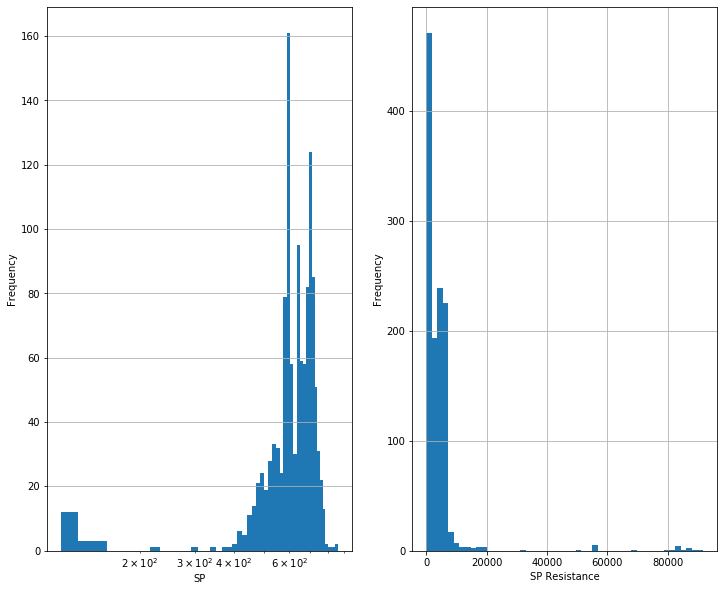

In [20]:
pt.subplot(1,2,1)
ax=data.SP_mV.hist(bins=50)
ax.set_xscale('log')
ax.set_ylabel('Frequency')
ax.set_xlabel('SP')

pt.subplot(1,2,2)
ax=data.SPResistance_Ohm.hist(bins=50)
ax.set_ylabel('Frequency')
ax.set_xlabel('SP Resistance')



Text(0.5, 0, 'Temperature')

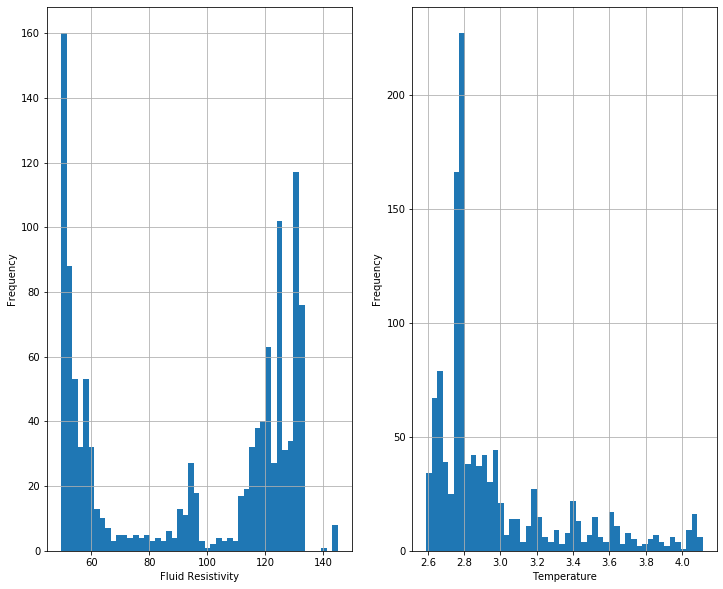

In [21]:
pt.subplot(1,2,1)
ax=data.FluidResistivity_Ohm.hist(bins=50)

ax.set_ylabel('Frequency')
ax.set_xlabel('Fluid Resistivity')

pt.subplot(1,2,2)
ax=data.Temperature_DegC.hist(bins=50)
ax.set_ylabel('Frequency')
ax.set_xlabel('Temperature')

Text(0.5, 0, '16 Inch Resistivity')

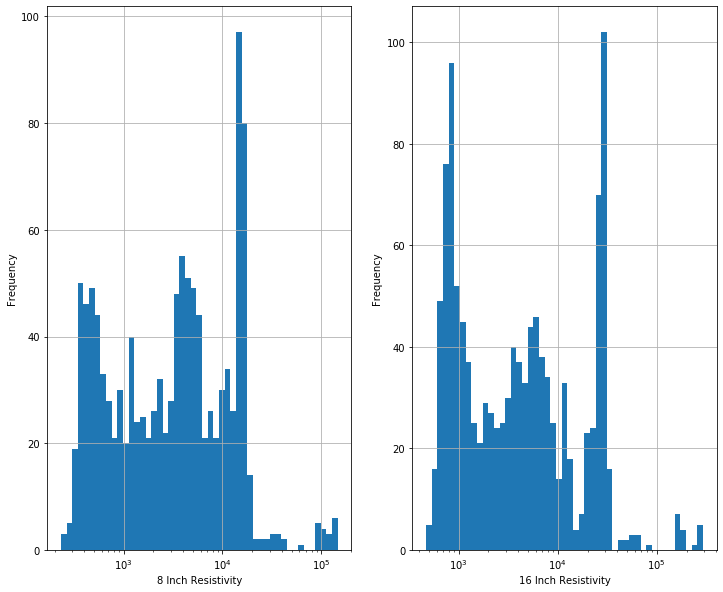

In [22]:
pt.subplot(1,2,1)
ax=data['Res8_Ohm-m'].hist(bins=np.logspace(np.min(np.log10(data['Res8_Ohm-m'])),np.max(np.log10(data['Res8_Ohm-m']))))
ax.set_xscale('log')
ax.set_ylabel('Frequency')
ax.set_xlabel('8 Inch Resistivity')

pt.subplot(1,2,2)
ax=data['Res16_Ohm-m'].hist(bins=np.logspace(np.min(np.log10(data['Res16_Ohm-m'])),np.max(np.log10(data['Res16_Ohm-m']))))
ax.set_xscale('log')
ax.set_ylabel('Frequency')
ax.set_xlabel('16 Inch Resistivity')

c:\python37\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


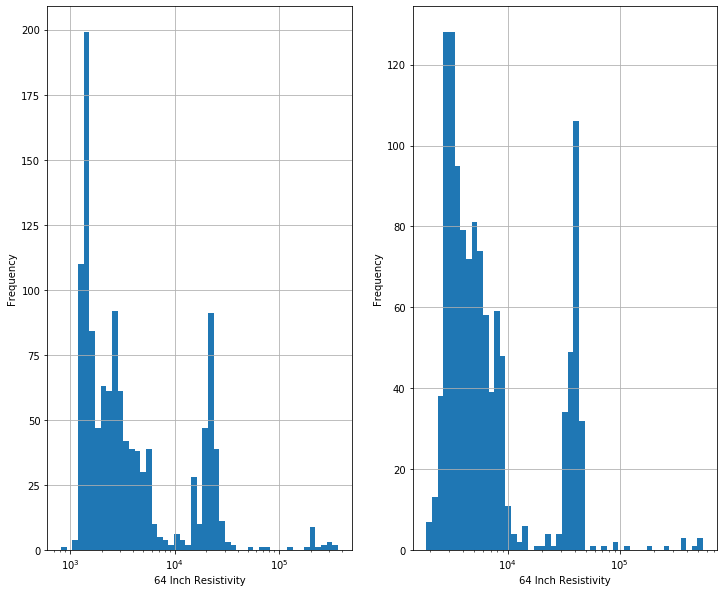

In [23]:
pt.subplot(1,2,1);
ax=data['Res32_Ohm-m'].hist(bins=np.logspace(np.min(np.log10(data['Res32_Ohm-m'])),np.max(np.log10(data['Res32_Ohm-m']))));
ax.set_xscale('log');
ax.set_ylabel('Frequency');
ax.set_xlabel('64 Inch Resistivity');

pt.subplot(1,2,2);
ax=data['Res64_Ohm-m'].hist(bins=np.logspace(np.min(np.log10(data['Res64_Ohm-m'])),np.max(np.log10(data['Res64_Ohm-m']))));
ax.set_xscale('log');
ax.set_ylabel('Frequency');
ax.set_xlabel('64 Inch Resistivity');

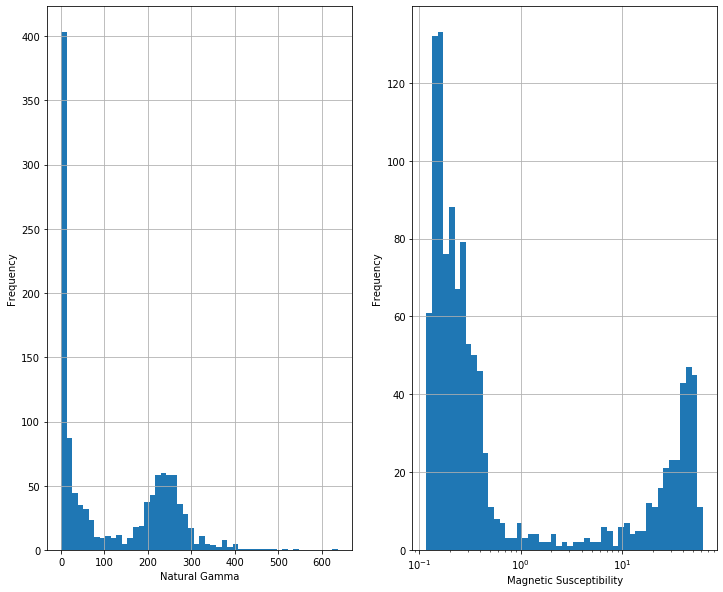

In [24]:
pt.subplot(1,2,1);
ax=data.NaturalGamma_API.hist(bins=50);

ax.set_ylabel('Frequency');
ax.set_xlabel('Natural Gamma');

pt.subplot(1,2,2);
ax=data.MS_mCGS.hist(bins=np.logspace(np.min(np.log10(data['MS_mCGS'])),np.max(np.log10(data['MS_mCGS']))));
ax.set_xscale('log');
ax.set_ylabel('Frequency');
ax.set_xlabel('Magnetic Susceptibility');

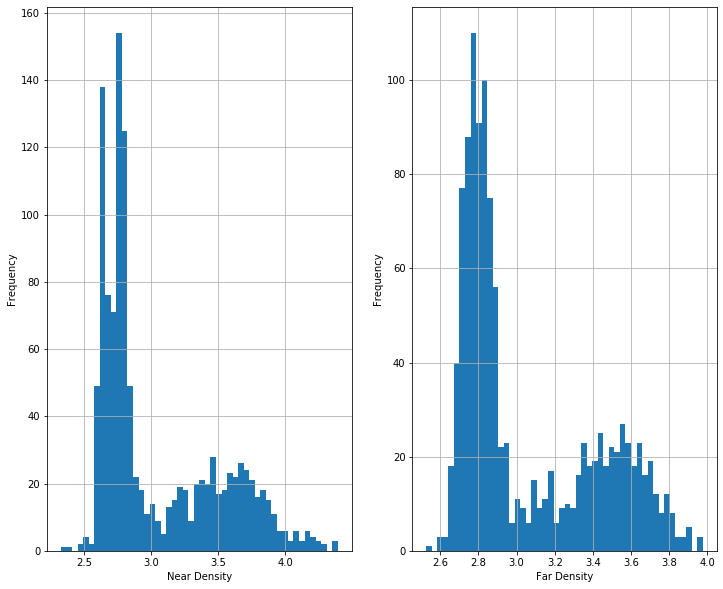

In [25]:
pt.subplot(1,2,1);
ax=data.NearDensity_gcc.hist(bins=50);

ax.set_ylabel('Frequency');
ax.set_xlabel('Near Density');

pt.subplot(1,2,2);
ax=data.FarDensity_gcc.hist(bins=50);
ax.set_ylabel('Frequency');
ax.set_xlabel('Far Density');

***
# Question 2
The distributions shown above generally do not show a normal distribution. Explain why this is the case.






***

### Scatter (Cross) Plots

The scatter plots will be coloured coded by RockType. For simplicity, we'll show only the following graphs:

- 16 Inch Resistivity vs. Magnetic Susceptibility
- 16 Inch Resistivity vs. Near Density
- Magnetic Susceptibility vs. Near Density
- Natural Gamma vs. Near Density.

First we define the unique RockType and assign each a standard color. 

In [26]:
uniqueGroups=data.RockType.unique();
uniqueGroups.sort()
nColor=len(uniqueGroups)
cmap = matplotlib.cm.get_cmap('jet',nColor);
colors=cmap(np.arange(nColor))


The code below cycles through each rock type from the RockType column finds the rows where that rock type exists and generates a new data table for it. 

The specified columns are then plotted against each other. 

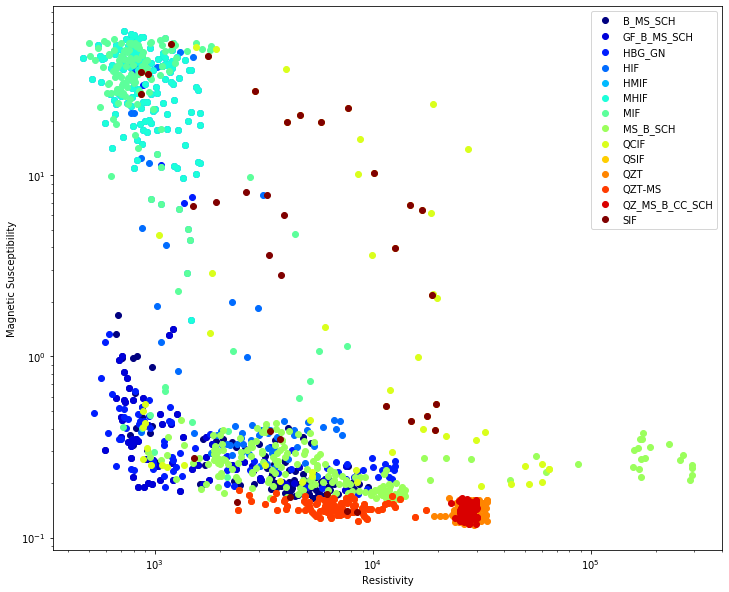

In [27]:
for i,co in zip(uniqueGroups,colors) :
    dataGroup=data[data.RockType.str.contains(i)]
    ax=pt.plot(dataGroup['Res16_Ohm-m'],dataGroup['MS_mCGS'],color=co,label=i,
               linestyle='None', marker='o');
pt.legend();
ax=pt.gca();
ax.set_xscale('log');
ax.set_yscale('log');
ax.set_ylabel('Magnetic Susceptibility');
ax.set_xlabel('Resistivity');


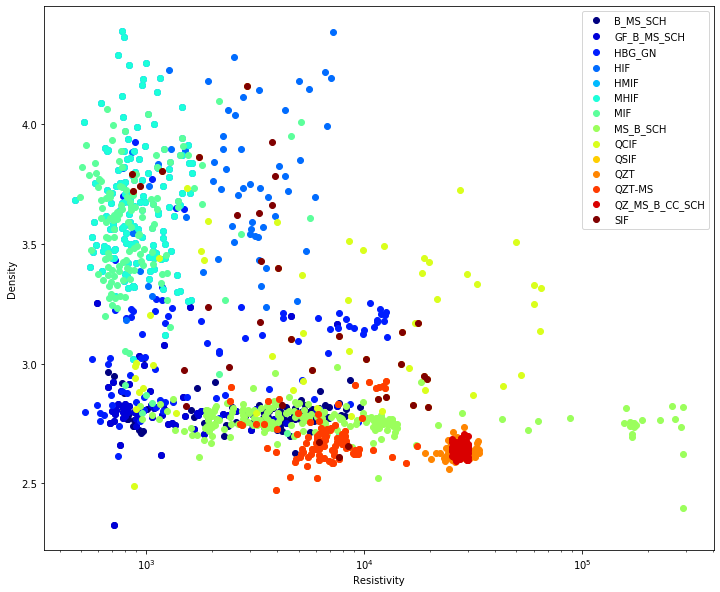

In [28]:
for i,co in zip(uniqueGroups,colors) :
    dataGroup=data[data.RockType.str.contains(i)]
    ax=pt.plot(dataGroup['Res16_Ohm-m'],dataGroup['NearDensity_gcc'],color=co,label=i,
               linestyle='None', marker='o');
pt.legend();
ax=pt.gca();
ax.set_xscale('log');
ax.set_ylabel('Density');
ax.set_xlabel('Resistivity');

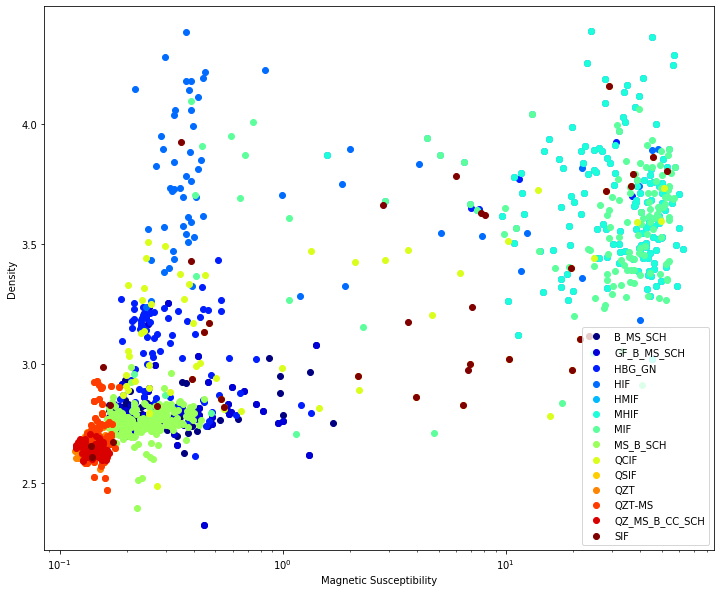

In [29]:
for i,co in zip(uniqueGroups,colors) :
    dataGroup=data[data.RockType.str.contains(i)]
    ax=pt.plot(dataGroup['MS_mCGS'],dataGroup['NearDensity_gcc'],color=co,label=i,
               linestyle='None', marker='o');
pt.legend();
ax=pt.gca();
ax.set_xscale('log');
ax.set_ylabel('Density');
ax.set_xlabel('Magnetic Susceptibility');

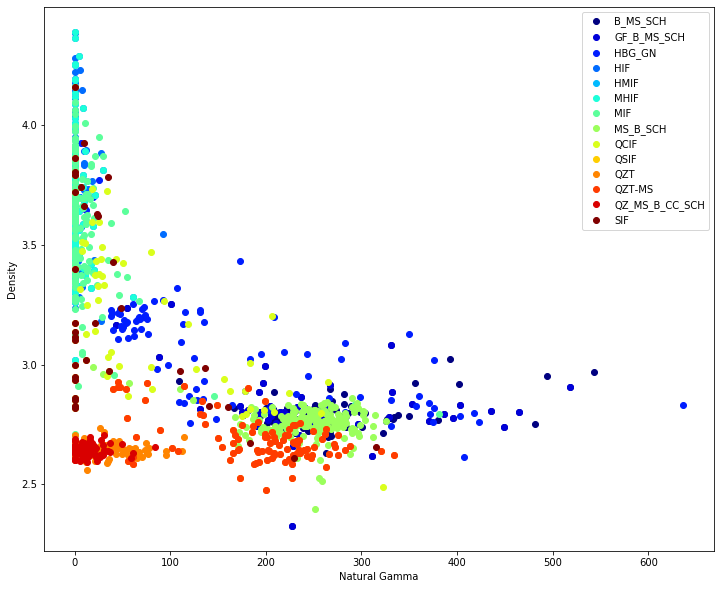

In [30]:
for i,co in zip(uniqueGroups,colors) :
    dataGroup=data[data.RockType.str.contains(i)]
    ax=pt.plot(dataGroup['NaturalGamma_API'],dataGroup['NearDensity_gcc'],color=co,label=i,
               linestyle='None', marker='o');
pt.legend();
ax=pt.gca();
ax.set_ylabel('Density');
ax.set_xlabel('Natural Gamma');

### Box and Whisker Plots

Box and Whisker plots (hereafter referred to as boxplots) are used to compare grouped data for a single variable.  They are useful because they provide a lot of information in a compact, visual manner. Boxplots can be viewed horizontally or vertically, below is an example of a horizontal boxplot, showing how it compares to a normal distribution.  Q1 and Q3 refer to the first and third quartiles represented by the left and right edges of the box respectively (in a vertical boxplot it is represented by the bottom and top). The median is represented by the solid line in the center of the box. The whiskers are generally represented as being 1.5 times the inter-quartile range (IQR) and then added to or subtracted from Q1 and Q3. Points that fall outside of these ranges are classifed as outliers and are represented by points ('+' symbol in the case of the plots shown below).
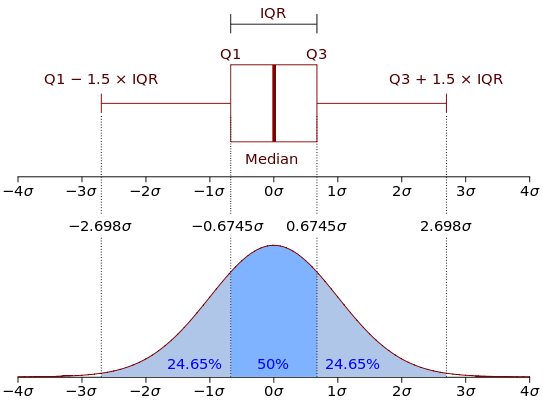


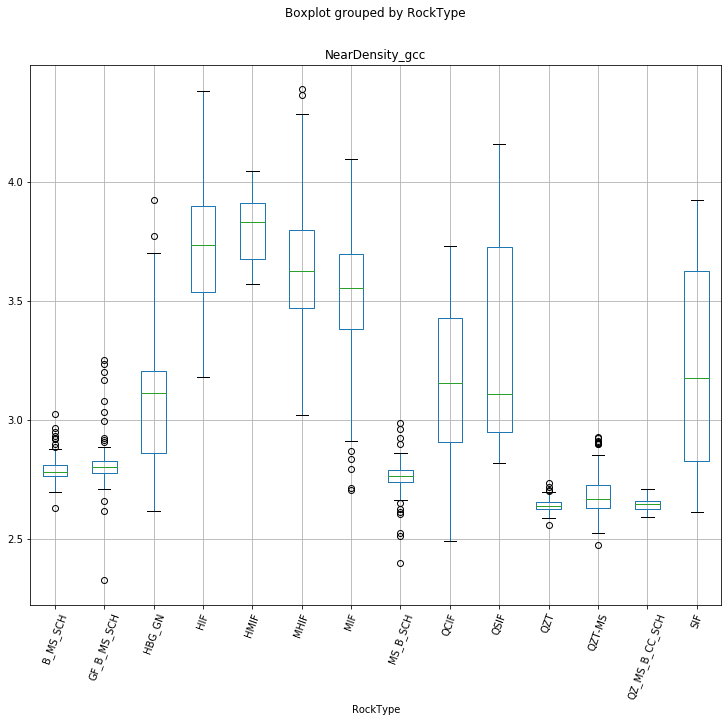

In [31]:
ax=data.boxplot(column='NearDensity_gcc',by='RockType',vert=True);
pt.xticks(rotation=70);

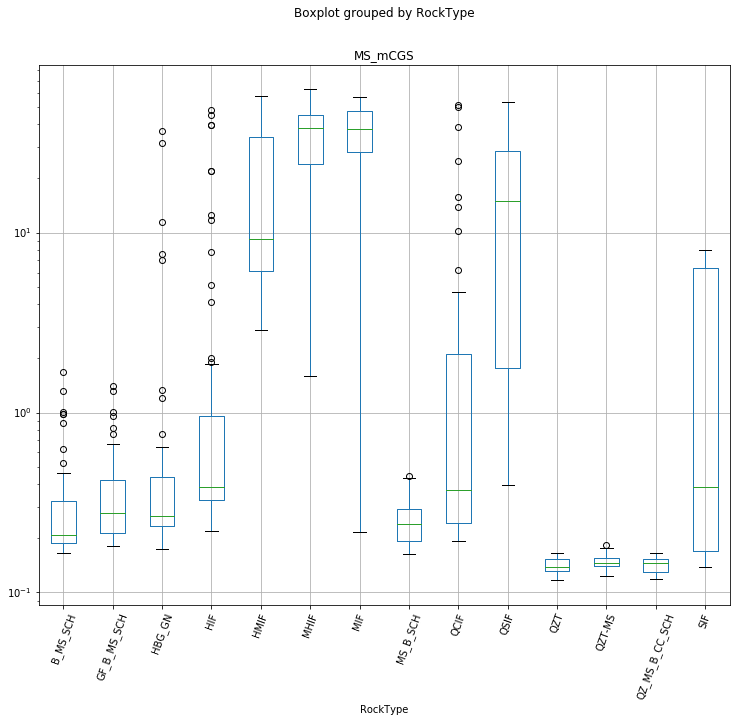

In [32]:
ax=data.boxplot(column='MS_mCGS',by='RockType',vert=True);
ax.set_yscale('log')
pt.xticks(rotation=70);


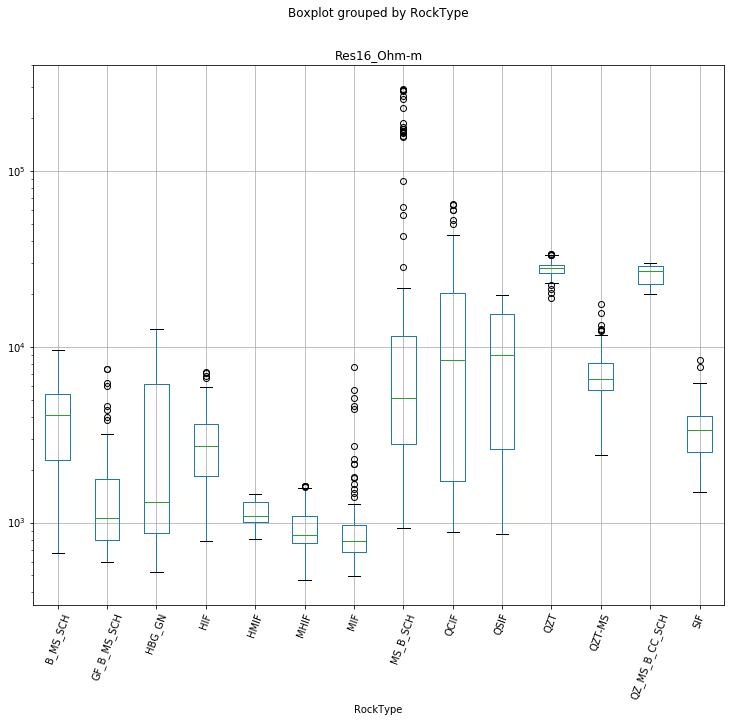

In [33]:
ax=data.boxplot(column='Res16_Ohm-m',by='RockType',vert=True);
ax.set_yscale('log')
pt.xticks(rotation=70);

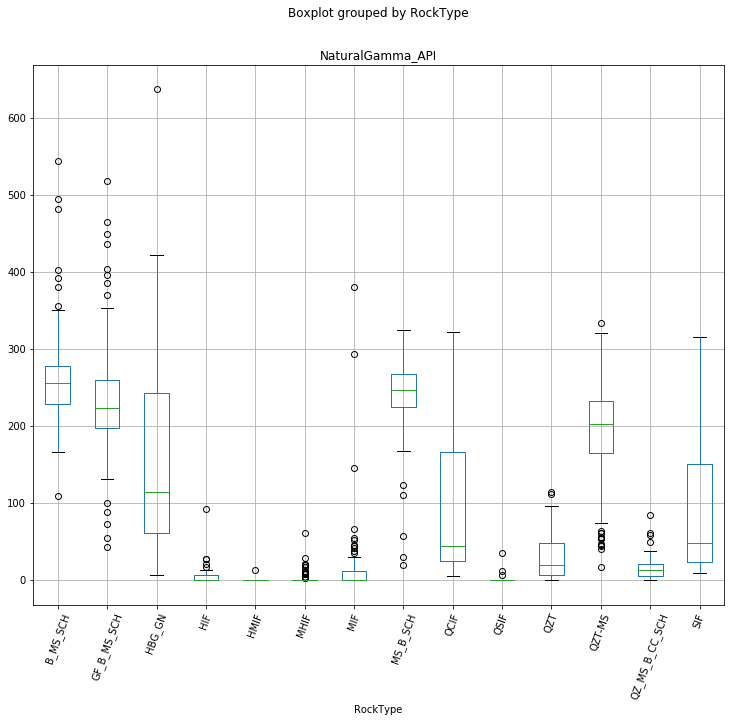

In [34]:
ax=data.boxplot(column='NaturalGamma_API',by='RockType',vert=True);
pt.xticks(rotation=70);

*** 
# Question 3
From the scatter and boxplots, there are three to four different groupings that become apparent.  Describe how those groups relate to each physical parameter and rock type.




***

***
# Question 4
Based on the conclusions above, what further geophysical surveys (airborne, ground, borehole) would you perform to further help understand the deposit? 



***